# Compare WG Simulated, Contiguous Wet Days to Data

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
import datetime as dt
import sqlalchemy
import seaborn as sns

In [3]:
# all months for prism
PRISM_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochas' \
           r'tic_CC_Recharge\Data\JNotes\Processed\PRISM\WetDays_1981-2010.pickle'
WG_IN_DIR = r'C:\Temp\WG_Test_Out\Test2\Processed'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test2\Processed\Comparison'
OUT_ROOT = "DC_WGMN2"
H0_ROOT = "H0_Data_WetDays_G"

In [4]:
LOCA_KEYS = [ 62, 63, 64, 76, 77, 78, 79, 90, 91, 92, 93, 94,
              104, 105, 106, 107, 108, 120, 121, 122, 123, 137 ]
NUM_LOCA_GRID = len( LOCA_KEYS )

Load all PRISM

In [5]:
PRAllDF = pd.read_pickle( PRISM_IN )

In [6]:
display( HTML( PRAllDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Wet_Count,Total_Depth,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19
0,662328,1981,1,6,1,1.31,1.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,662328,1981,1,9,1,7.96,7.96,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,662328,1981,1,11,1,0.32,0.32,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,662328,1981,1,14,1,0.70,0.70,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,662328,1981,1,17,3,12.92,1.08,5.27,6.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
display( HTML( PRAllDF.describe().to_html() ) )

,Grid_Id,Year,Month,Day,Wet_Count,Total_Depth,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19
count,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000,226190.000000
mean,671315.617972,1995.406141,6.306658,15.876966,1.930748,14.844876,6.314675,4.691103,1.809316,0.866333,0.451123,0.252808,0.172082,0.102201,0.029241,0.014211,0.041145,0.054286,0.017693,0.006229,0.004210,0.006312,0.003994,0.007797,0.000040
std,5668.012976,8.709375,3.253769,8.895912,1.369366,22.393805,9.543975,9.888966,5.922898,5.191674,3.491162,2.808339,2.942173,2.307218,0.667743,0.419851,1.512172,1.773005,0.563330,0.199768,0.194175,0.317559,0.237523,0.451132,0.003869
min,662328.000000,1981.000000,1.000000,1.000000,1.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,666548.000000,1988.000000,4.000000,8.000000,1.000000,1.830000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,670770.000000,1995.000000,6.000000,15.000000,2.000000,6.660000,2.690000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,676383.000000,2003.000000,9.000000,24.000000,2.000000,18.290000,7.570000,5.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,680607.000000,2010.000000,12.000000,31.000000,19.000000,430.489999,199.639999,235.470001,170.809998,250.429993,117.230003,88.150002,361.529999,217.410004,53.560001,36.930000,164.240005,140.009995,41.040001,21.820000,14.150000,23.450001,28.059999,34.740002,0.490000


Next load all grid cells and concatenate from the WG

In [8]:
DFList = list()

In [9]:
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H0_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for

Now concatenate

In [10]:
NumDF = len( DFList )
NumDF

22

In [11]:
H0DDDF = pd.concat( DFList, ignore_index=True )

In [12]:
CurColumns = list( H0DDDF.columns )
CurColumns[3] = 'Wet_Count'
CurColumns

['Year', 'Month', 'Day', 'Wet_Count']

In [13]:
H0DDDF.columns = CurColumns

In [14]:
display( HTML( H0DDDF.head().to_html() ) )

,Year,Month,Day,Wet_Count
0,1980,1,5,3
1,1980,2,7,3
2,1980,2,13,2
3,1980,2,29,2
4,1980,3,5,3


In [15]:
display( HTML( H0DDDF.describe().to_html() ) )

,Year,Month,Day,Wet_Count
count,2.375268e+08,2.375268e+08,2.375268e+08,2.375268e+08
mean,1.994989e+03,6.355838e+00,1.572146e+01,2.143392e+00
std,8.947478e+00,3.285988e+00,8.804661e+00,1.521063e+00
min,1.980000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.987000e+03,4.000000e+00,8.000000e+00,1.000000e+00
50%,1.995000e+03,6.000000e+00,1.600000e+01,2.000000e+00
75%,2.003000e+03,9.000000e+00,2.300000e+01,3.000000e+00
max,2.010000e+03,1.200000e+01,3.100000e+01,1.900000e+01


Can now drop some columns

In [16]:
H0DDDF.drop( columns=['Year', 'Day'], inplace=True )
PRAllDF.drop( columns=['Grid_Id', 'Year', 'Day'], inplace=True )

In [17]:
ExtraCols = list( PRAllDF.columns )
ExtraCols[2:]

['Total_Depth',
 'Day_1',
 'Day_2',
 'Day_3',
 'Day_4',
 'Day_5',
 'Day_6',
 'Day_7',
 'Day_8',
 'Day_9',
 'Day_10',
 'Day_11',
 'Day_12',
 'Day_13',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_18',
 'Day_19']

In [18]:
PRAllDF.drop( columns=ExtraCols[2:], inplace=True )

In [19]:
display(HTML( PRAllDF.head().to_html()))

,Month,Wet_Count
0,1,1
1,1,1
2,1,1
3,1,1
4,1,3


In [20]:
display(HTML( H0DDDF.head().to_html()))

,Month,Wet_Count
0,1,3
1,2,3
2,2,2
3,2,2
4,3,3


Now filter all into monthly values

In [21]:
PRJanDF = PRAllDF[PRAllDF['Month'] == 1].copy()
PRFebDF = PRAllDF[PRAllDF['Month'] == 2].copy()
PRMarDF = PRAllDF[PRAllDF['Month'] == 3].copy()
PRAprDF = PRAllDF[PRAllDF['Month'] == 4].copy()
PRMayDF = PRAllDF[PRAllDF['Month'] == 5].copy()
PRJunDF = PRAllDF[PRAllDF['Month'] == 6].copy()
PRJulDF = PRAllDF[PRAllDF['Month'] == 7].copy()
PRAugDF = PRAllDF[PRAllDF['Month'] == 8].copy()
PRSepDF = PRAllDF[PRAllDF['Month'] == 9].copy()
PROctDF = PRAllDF[PRAllDF['Month'] == 10].copy()
PRNovDF = PRAllDF[PRAllDF['Month'] == 11].copy()
PRDecDF = PRAllDF[PRAllDF['Month'] == 12].copy()

In [22]:
H0JanDF = H0DDDF[H0DDDF['Month'] == 1].copy()
H0FebDF = H0DDDF[H0DDDF['Month'] == 2].copy()
H0MarDF = H0DDDF[H0DDDF['Month'] == 3].copy()
H0AprDF = H0DDDF[H0DDDF['Month'] == 4].copy()
H0MayDF = H0DDDF[H0DDDF['Month'] == 5].copy()
H0JunDF = H0DDDF[H0DDDF['Month'] == 6].copy()
H0JulDF = H0DDDF[H0DDDF['Month'] == 7].copy()
H0AugDF = H0DDDF[H0DDDF['Month'] == 8].copy()
H0SepDF = H0DDDF[H0DDDF['Month'] == 9].copy()
H0OctDF = H0DDDF[H0DDDF['Month'] == 10].copy()
H0NovDF = H0DDDF[H0DDDF['Month'] == 11].copy()
H0DecDF = H0DDDF[H0DDDF['Month'] == 12].copy()

In [23]:
MonthLister = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", 
                 "Sep", "Oct", "Nov", "Dec", "All" ]
AveLister = list()
VarLister = list()
SkewLister = list()
KurtLister = list()
PLister = list()
NLister = list()
CntLister = list()
MedianLister = list()
MaxLister = list()
MinLister = list()

In [24]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

## Jan

First get our overall tracking values

In [25]:
AveLister.append( [ PRJanDF['Wet_Count'].mean(), H0JanDF['Wet_Count'].mean() ] )
VarLister.append( [ PRJanDF['Wet_Count'].var(), H0JanDF['Wet_Count'].var() ] )
SkewLister.append( [ PRJanDF['Wet_Count'].skew(), H0JanDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRJanDF['Wet_Count'].kurtosis(), H0JanDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRJanDF['Wet_Count'].count(), H0JanDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJanDF['Wet_Count'].var() - PRJanDF['Wet_Count'].mean() ) / 
                            PRJanDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0JanDF['Wet_Count'].var() - H0JanDF['Wet_Count'].mean() ) / 
                            H0JanDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRJanDF['Wet_Count'].mean()**2.0 / 
                   ( PRJanDF['Wet_Count'].var() - PRJanDF['Wet_Count'].mean() ) ),
                  ( H0JanDF['Wet_Count'].mean()**2.0 / 
                   ( H0JanDF['Wet_Count'].var() - H0JanDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRJanDF['Wet_Count'].median(), H0JanDF['Wet_Count'].median() ] )
MaxLister.append( [ PRJanDF['Wet_Count'].max(), H0JanDF['Wet_Count'].max() ] )
MinLister.append( [ PRJanDF['Wet_Count'].min(), H0JanDF['Wet_Count'].min() ] )

In [26]:
NumPR = len( PRJanDF )
NumH0 = len( H0JanDF )
NumPR, NumH0

(16990, 18067588)

In [27]:
CompJan = pd.DataFrame( data={ 'PRISM' : np.array( PRJanDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JanDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [28]:
display( HTML( CompJan.describe().to_html() ) )

,PRISM,WG H0
count,16990.000000,16990.000000
mean,1.866392,2.097234
std,1.165071,1.492646
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,12.000000,14.000000


In [29]:
PRQs = CompJan['PRISM'].quantile( q=OurQs )

In [30]:
H0Qs = CompJan['WG H0'].quantile( q=OurQs )

In [31]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

14.0

In [32]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

20.0

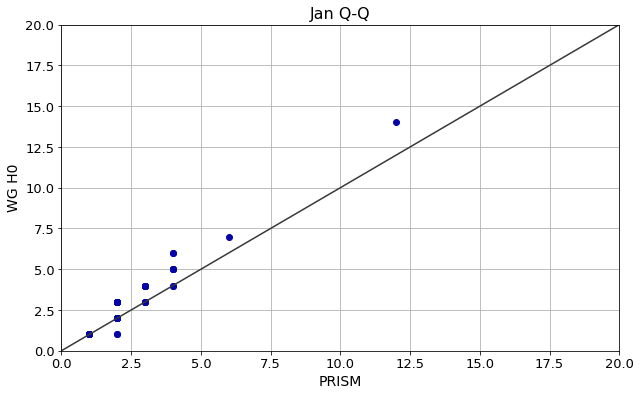

In [33]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [34]:
sns.set(style="ticks", color_codes=True)

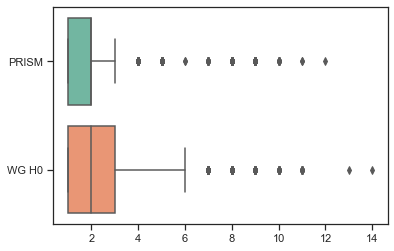

In [35]:
ax = sns.boxplot(data=CompJan, orient="h", palette="Set2")

In [36]:
sns.set(style="white", color_codes=True)

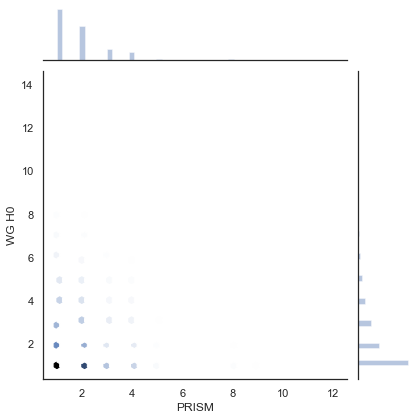

In [37]:
JanG = sns.jointplot(x='PRISM', y='WG H0', data=CompJan, kind="hex")

## Feb

First get our overall tracking values

In [38]:
AveLister.append( [ PRFebDF['Wet_Count'].mean(), H0FebDF['Wet_Count'].mean() ] )
VarLister.append( [ PRFebDF['Wet_Count'].var(), H0FebDF['Wet_Count'].var() ] )
SkewLister.append( [ PRFebDF['Wet_Count'].skew(), H0FebDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRFebDF['Wet_Count'].kurtosis(), H0FebDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRFebDF['Wet_Count'].count(), H0FebDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRFebDF['Wet_Count'].var() - PRFebDF['Wet_Count'].mean() ) / 
                            PRFebDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0FebDF['Wet_Count'].var() - H0FebDF['Wet_Count'].mean() ) / 
                            H0FebDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRFebDF['Wet_Count'].mean()**2.0 / 
                   ( PRFebDF['Wet_Count'].var() - PRFebDF['Wet_Count'].mean() ) ),
                  ( H0FebDF['Wet_Count'].mean()**2.0 / 
                   ( H0FebDF['Wet_Count'].var() - H0FebDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRFebDF['Wet_Count'].median(), H0FebDF['Wet_Count'].median() ] )
MaxLister.append( [ PRFebDF['Wet_Count'].max(), H0FebDF['Wet_Count'].max() ] )
MinLister.append( [ PRFebDF['Wet_Count'].min(), H0FebDF['Wet_Count'].min() ] )

In [39]:
NumPR = len( PRFebDF )
NumH0 = len( H0FebDF )
NumPR, NumH0

(17193, 18219410)

In [40]:
CompFeb = pd.DataFrame( data={ 'PRISM' : np.array( PRFebDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0FebDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [41]:
display( HTML( CompFeb.describe().to_html() ) )

,PRISM,WG H0
count,17193.000000,17193.000000
mean,1.815739,2.052463
std,1.053266,1.468386
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,3.000000
max,9.000000,13.000000


In [42]:
PRQs = CompFeb['PRISM'].quantile( q=OurQs )

In [43]:
H0Qs = CompFeb['WG H0'].quantile( q=OurQs )

In [44]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

13.0

In [45]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

20.0

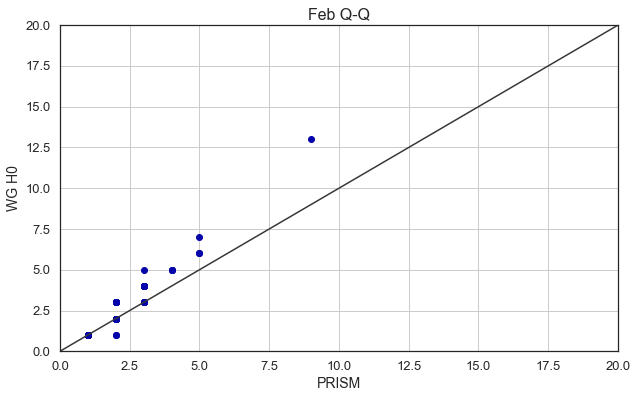

In [46]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Feb Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [47]:
sns.set(style="ticks", color_codes=True)

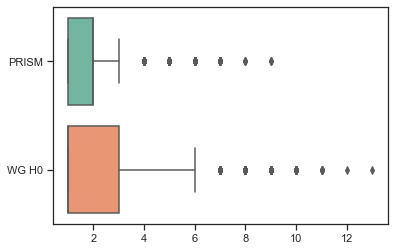

In [48]:
ax = sns.boxplot(data=CompFeb, orient="h", palette="Set2")

In [49]:
sns.set(style="white", color_codes=True)

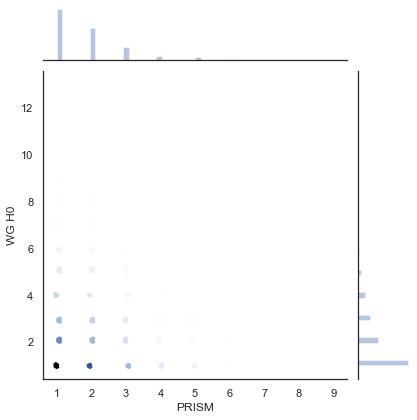

In [50]:
FebG = sns.jointplot(x='PRISM', y='WG H0', data=CompFeb, kind="hex")

## Mar

First get our overall tracking values

In [51]:
AveLister.append( [ PRMarDF['Wet_Count'].mean(), H0MarDF['Wet_Count'].mean() ] )
VarLister.append( [ PRMarDF['Wet_Count'].var(), H0MarDF['Wet_Count'].var() ] )
SkewLister.append( [ PRMarDF['Wet_Count'].skew(), H0MarDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRMarDF['Wet_Count'].kurtosis(), H0MarDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRMarDF['Wet_Count'].count(), H0MarDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRMarDF['Wet_Count'].var() - PRMarDF['Wet_Count'].mean() ) / 
                            PRMarDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0MarDF['Wet_Count'].var() - H0MarDF['Wet_Count'].mean() ) / 
                            H0MarDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRMarDF['Wet_Count'].mean()**2.0 / 
                   ( PRMarDF['Wet_Count'].var() - PRMarDF['Wet_Count'].mean() ) ),
                  ( H0MarDF['Wet_Count'].mean()**2.0 / 
                   ( H0MarDF['Wet_Count'].var() - H0MarDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRMarDF['Wet_Count'].median(), H0MarDF['Wet_Count'].median() ] )
MaxLister.append( [ PRMarDF['Wet_Count'].max(), H0MarDF['Wet_Count'].max() ] )
MinLister.append( [ PRMarDF['Wet_Count'].min(), H0MarDF['Wet_Count'].min() ] )

In [52]:
NumPR = len( PRMarDF )
NumH0 = len( H0MarDF )
NumPR, NumH0

(20910, 20345776)

In [53]:
CompMar = pd.DataFrame( data={ 'PRISM' : np.array( PRMarDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0MarDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [54]:
display( HTML( CompMar.describe().to_html() ) )

,PRISM,WG H0
count,20910.000000,20910.000000
mean,1.761789,2.021521
std,1.076056,1.456239
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,8.000000,12.000000


In [55]:
PRQs = CompMar['PRISM'].quantile( q=OurQs )

In [56]:
H0Qs = CompMar['WG H0'].quantile( q=OurQs )

In [57]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

12.0

In [58]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

20.0

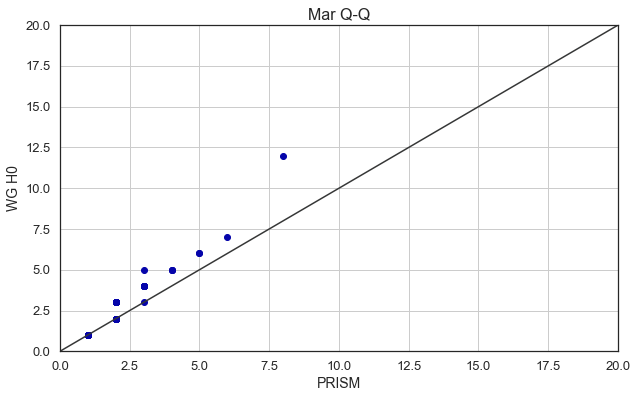

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [60]:
sns.set(style="ticks", color_codes=True)

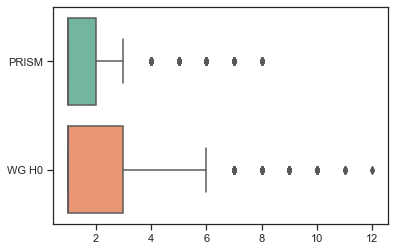

In [61]:
ax = sns.boxplot(data=CompMar, orient="h", palette="Set2")

In [62]:
sns.set(style="white", color_codes=True)

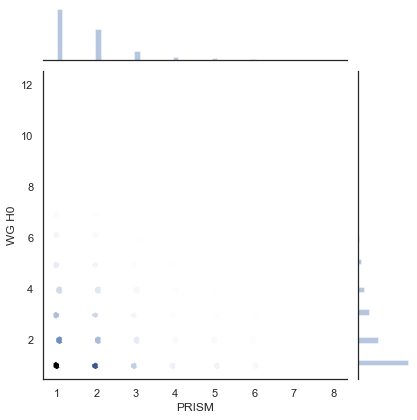

In [63]:
MarG = sns.jointplot(x='PRISM', y='WG H0', data=CompMar, kind="hex")

## Apr

First get our overall tracking values

In [64]:
AveLister.append( [ PRAprDF['Wet_Count'].mean(), H0AprDF['Wet_Count'].mean() ] )
VarLister.append( [ PRAprDF['Wet_Count'].var(), H0AprDF['Wet_Count'].var() ] )
SkewLister.append( [ PRAprDF['Wet_Count'].skew(), H0AprDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRAprDF['Wet_Count'].kurtosis(), H0AprDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRAprDF['Wet_Count'].count(), H0AprDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAprDF['Wet_Count'].var() - PRAprDF['Wet_Count'].mean() ) / 
                            PRAprDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0AprDF['Wet_Count'].var() - H0AprDF['Wet_Count'].mean() ) / 
                            H0AprDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRAprDF['Wet_Count'].mean()**2.0 / 
                   ( PRAprDF['Wet_Count'].var() - PRAprDF['Wet_Count'].mean() ) ),
                  ( H0AprDF['Wet_Count'].mean()**2.0 / 
                   ( H0AprDF['Wet_Count'].var() - H0AprDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRAprDF['Wet_Count'].median(), H0AprDF['Wet_Count'].median() ] )
MaxLister.append( [ PRAprDF['Wet_Count'].max(), H0AprDF['Wet_Count'].max() ] )
MinLister.append( [ PRAprDF['Wet_Count'].min(), H0AprDF['Wet_Count'].min() ] )

In [65]:
NumPR = len( PRAprDF )
NumH0 = len( H0AprDF )
NumPR, NumH0

(18513, 20607708)

In [66]:
CompApr = pd.DataFrame( data={ 'PRISM' : np.array( PRAprDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0AprDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [67]:
display( HTML( CompApr.describe().to_html() ) )

,PRISM,WG H0
count,18513.000000,18513.000000
mean,1.768595,2.017555
std,1.015030,1.437124
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,6.000000,12.000000


In [68]:
PRQs = CompApr['PRISM'].quantile( q=OurQs )

In [69]:
H0Qs = CompApr['WG H0'].quantile( q=OurQs )

In [70]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

12.0

In [71]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

20.0

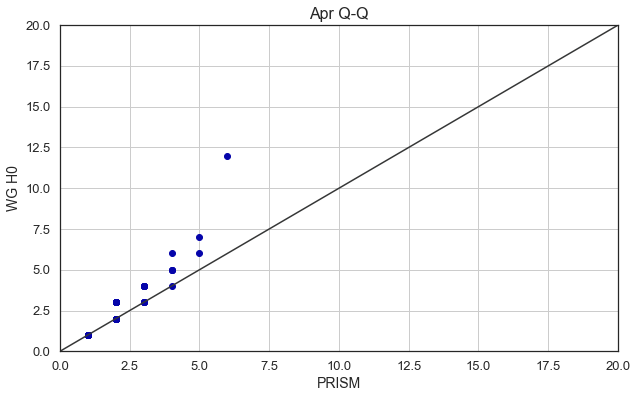

In [72]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [73]:
sns.set(style="ticks", color_codes=True)

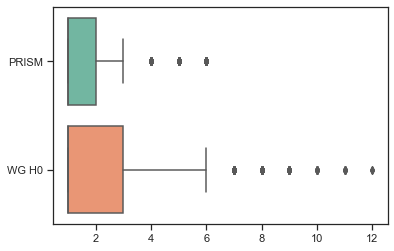

In [74]:
ax = sns.boxplot(data=CompApr, orient="h", palette="Set2")

In [75]:
sns.set(style="white", color_codes=True)

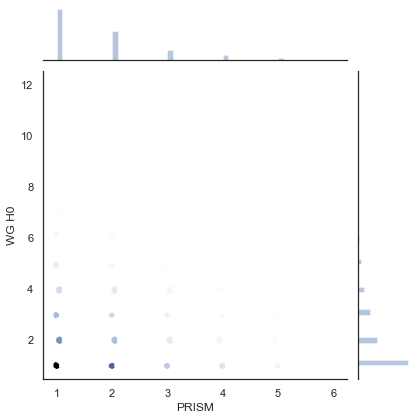

In [76]:
AprG = sns.jointplot(x='PRISM', y='WG H0', data=CompApr, kind="hex")

## May

First get our overall tracking values

In [77]:
AveLister.append( [ PRMayDF['Wet_Count'].mean(), H0MayDF['Wet_Count'].mean() ] )
VarLister.append( [ PRMayDF['Wet_Count'].var(), H0MayDF['Wet_Count'].var() ] )
SkewLister.append( [ PRMayDF['Wet_Count'].skew(), H0MayDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRMayDF['Wet_Count'].kurtosis(), H0MayDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRMayDF['Wet_Count'].count(), H0MayDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRMayDF['Wet_Count'].var() - PRMayDF['Wet_Count'].mean() ) / 
                            PRMayDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0MayDF['Wet_Count'].var() - H0MayDF['Wet_Count'].mean() ) / 
                            H0MayDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRMayDF['Wet_Count'].mean()**2.0 / 
                   ( PRMayDF['Wet_Count'].var() - PRMayDF['Wet_Count'].mean() ) ),
                  ( H0MayDF['Wet_Count'].mean()**2.0 / 
                   ( H0MayDF['Wet_Count'].var() - H0MayDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRMayDF['Wet_Count'].median(), H0MayDF['Wet_Count'].median() ] )
MaxLister.append( [ PRMayDF['Wet_Count'].max(), H0MayDF['Wet_Count'].max() ] )
MinLister.append( [ PRMayDF['Wet_Count'].min(), H0MayDF['Wet_Count'].min() ] )

In [78]:
NumPR = len( PRMayDF )
NumH0 = len( H0MayDF )
NumPR, NumH0

(24916, 24942654)

In [79]:
CompMay = pd.DataFrame( data={ 'PRISM' : np.array( PRMayDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0MayDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [80]:
display( HTML( CompMay.describe().to_html() ) )

,PRISM,WG H0
count,24916.000000,24916.000000
mean,1.862177,2.093394
std,1.305705,1.486897
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,17.000000,14.000000


In [81]:
PRQs = CompMay['PRISM'].quantile( q=OurQs )

In [82]:
H0Qs = CompMay['WG H0'].quantile( q=OurQs )

In [83]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

17.0

In [84]:
MaxVal = round( MaxVal, -1 ) + 0.0
MaxVal

20.0

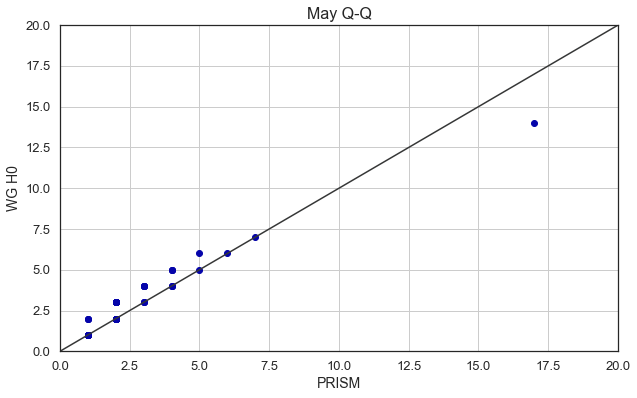

In [85]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [86]:
sns.set(style="ticks", color_codes=True)

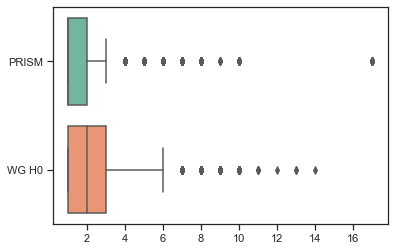

In [87]:
ax = sns.boxplot(data=CompMay, orient="h", palette="Set2")

In [88]:
sns.set(style="white", color_codes=True)

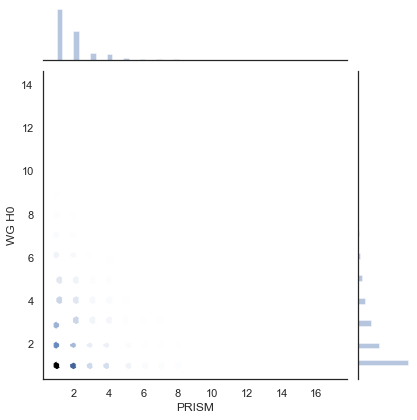

In [89]:
MayG = sns.jointplot(x='PRISM', y='WG H0', data=CompMay, kind="hex")

## Jun

First get our overall tracking values

In [90]:
AveLister.append( [ PRJunDF['Wet_Count'].mean(), H0JunDF['Wet_Count'].mean() ] )
VarLister.append( [ PRJunDF['Wet_Count'].var(), H0JunDF['Wet_Count'].var() ] )
SkewLister.append( [ PRJunDF['Wet_Count'].skew(), H0JunDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRJunDF['Wet_Count'].kurtosis(), H0JunDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRJunDF['Wet_Count'].count(), H0JunDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJunDF['Wet_Count'].var() - PRJunDF['Wet_Count'].mean() ) / 
                            PRJunDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0JunDF['Wet_Count'].var() - H0JunDF['Wet_Count'].mean() ) / 
                            H0JunDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRJunDF['Wet_Count'].mean()**2.0 / 
                   ( PRJunDF['Wet_Count'].var() - PRJunDF['Wet_Count'].mean() ) ),
                  ( H0JunDF['Wet_Count'].mean()**2.0 / 
                   ( H0JunDF['Wet_Count'].var() - H0JunDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRJunDF['Wet_Count'].median(), H0JunDF['Wet_Count'].median() ] )
MaxLister.append( [ PRJunDF['Wet_Count'].max(), H0JunDF['Wet_Count'].max() ] )
MinLister.append( [ PRJunDF['Wet_Count'].min(), H0JunDF['Wet_Count'].min() ] )

In [91]:
NumPR = len( PRJunDF )
NumH0 = len( H0JunDF )
NumPR, NumH0

(22743, 22776732)

In [92]:
CompJun = pd.DataFrame( data={ 'PRISM' : np.array( PRJunDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JunDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [93]:
display( HTML( CompJun.describe().to_html() ) )

,PRISM,WG H0
count,22743.000000,22743.000000
mean,2.071890,2.269490
std,1.630758,1.578137
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,14.000000,14.000000


In [94]:
PRQs = CompJun['PRISM'].quantile( q=OurQs )

In [95]:
H0Qs = CompJun['WG H0'].quantile( q=OurQs )

In [96]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

14.0

In [97]:
MaxVal = round( MaxVal, -1 ) + 0.0
MaxVal

10.0

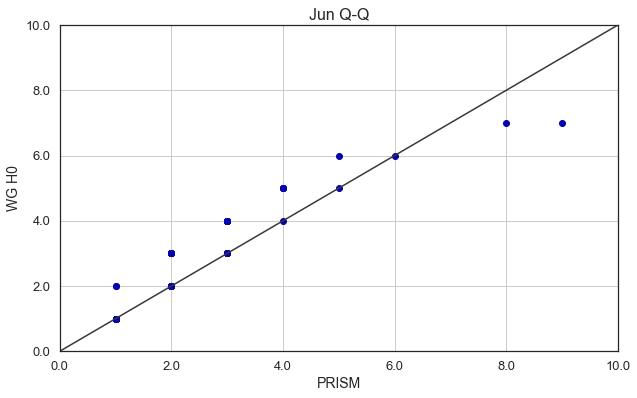

In [98]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [99]:
sns.set(style="ticks", color_codes=True)

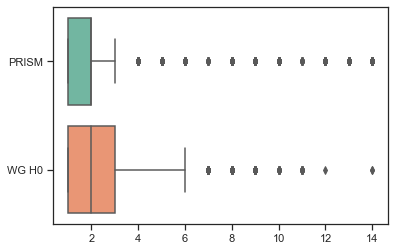

In [100]:
ax = sns.boxplot(data=CompJun, orient="h", palette="Set2")

In [101]:
sns.set(style="white", color_codes=True)

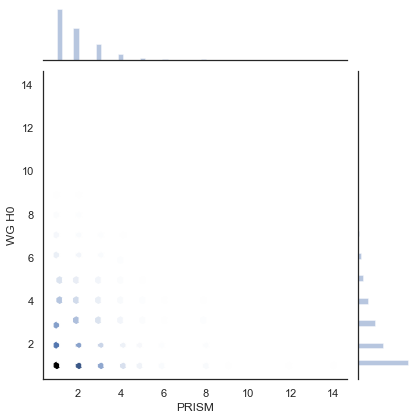

In [102]:
JunG = sns.jointplot(x='PRISM', y='WG H0', data=CompJun, kind="hex")

## Jul

First get our overall tracking values

In [103]:
AveLister.append( [ PRJulDF['Wet_Count'].mean(), H0JulDF['Wet_Count'].mean() ] )
VarLister.append( [ PRJulDF['Wet_Count'].var(), H0JulDF['Wet_Count'].var() ] )
SkewLister.append( [ PRJulDF['Wet_Count'].skew(), H0JulDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRJulDF['Wet_Count'].kurtosis(), H0JulDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRJulDF['Wet_Count'].count(), H0JulDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJulDF['Wet_Count'].var() - PRJulDF['Wet_Count'].mean() ) / 
                            PRJulDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0JulDF['Wet_Count'].var() - H0JulDF['Wet_Count'].mean() ) / 
                            H0JulDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRJulDF['Wet_Count'].mean()**2.0 / 
                   ( PRJulDF['Wet_Count'].var() - PRJulDF['Wet_Count'].mean() ) ),
                  ( H0JulDF['Wet_Count'].mean()**2.0 / 
                   ( H0JulDF['Wet_Count'].var() - H0JulDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRJulDF['Wet_Count'].median(), H0JulDF['Wet_Count'].median() ] )
MaxLister.append( [ PRJulDF['Wet_Count'].max(), H0JulDF['Wet_Count'].max() ] )
MinLister.append( [ PRJulDF['Wet_Count'].min(), H0JulDF['Wet_Count'].min() ] )

In [104]:
NumPR = len( PRJulDF )
NumH0 = len( H0JulDF )
NumPR, NumH0

(17334, 19453874)

In [105]:
CompJul = pd.DataFrame( data={ 'PRISM' : np.array( PRJulDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JulDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [106]:
display( HTML( CompJul.describe().to_html() ) )

,PRISM,WG H0
count,17334.000000,17334.000000
mean,2.056709,2.240337
std,1.494490,1.556578
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,13.000000,14.000000


In [107]:
PRQs = CompJul['PRISM'].quantile( q=OurQs )

In [108]:
H0Qs = CompJul['WG H0'].quantile( q=OurQs )

In [109]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

14.0

In [110]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

20.0

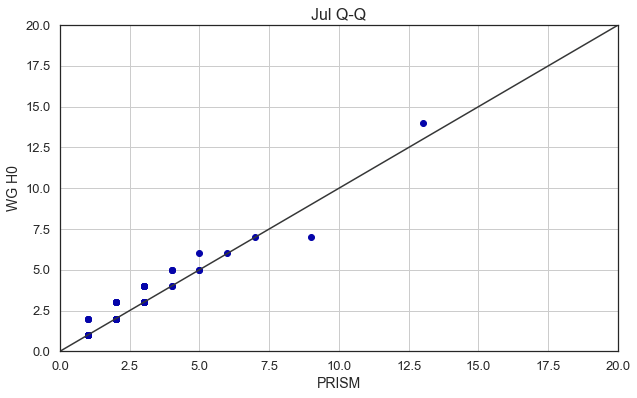

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jul Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [112]:
sns.set(style="ticks", color_codes=True)

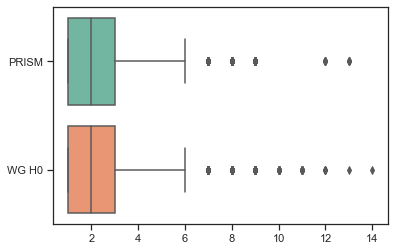

In [113]:
ax = sns.boxplot(data=CompJul, orient="h", palette="Set2")

In [114]:
sns.set(style="white", color_codes=True)

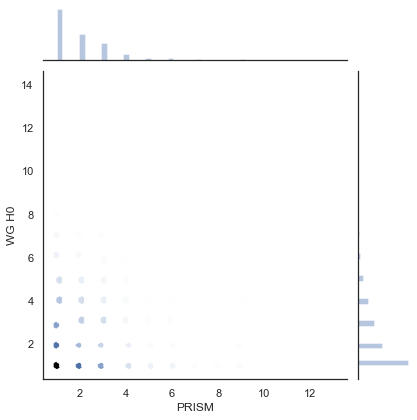

In [115]:
JulG = sns.jointplot(x='PRISM', y='WG H0', data=CompJul, kind="hex")

## Aug

First get our overall tracking values

In [116]:
AveLister.append( [ PRAugDF['Wet_Count'].mean(), H0AugDF['Wet_Count'].mean() ] )
VarLister.append( [ PRAugDF['Wet_Count'].var(), H0AugDF['Wet_Count'].var() ] )
SkewLister.append( [ PRAugDF['Wet_Count'].skew(), H0AugDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRAugDF['Wet_Count'].kurtosis(), H0AugDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRAugDF['Wet_Count'].count(), H0AugDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAugDF['Wet_Count'].var() - PRAugDF['Wet_Count'].mean() ) / 
                            PRAugDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0AugDF['Wet_Count'].var() - H0AugDF['Wet_Count'].mean() ) / 
                            H0AugDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRAugDF['Wet_Count'].mean()**2.0 / 
                   ( PRAugDF['Wet_Count'].var() - PRAugDF['Wet_Count'].mean() ) ),
                  ( H0AugDF['Wet_Count'].mean()**2.0 / 
                   ( H0AugDF['Wet_Count'].var() - H0AugDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRAugDF['Wet_Count'].median(), H0AugDF['Wet_Count'].median() ] )
MaxLister.append( [ PRAugDF['Wet_Count'].max(), H0AugDF['Wet_Count'].max() ] )
MinLister.append( [ PRAugDF['Wet_Count'].min(), H0AugDF['Wet_Count'].min() ] )

In [117]:
NumPR = len( PRAugDF )
NumH0 = len( H0AugDF )
NumPR, NumH0

(20087, 21634536)

In [118]:
CompAug = pd.DataFrame( data={ 'PRISM' : np.array( PRAugDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0AugDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [119]:
display( HTML( CompAug.describe().to_html() ) )

,PRISM,WG H0
count,20087.000000,20087.000000
mean,2.098422,2.275551
std,1.661041,1.575189
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,15.000000,17.000000


In [120]:
PRQs = CompAug['PRISM'].quantile( q=OurQs )

In [121]:
H0Qs = CompAug['WG H0'].quantile( q=OurQs )

In [122]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

17.0

In [123]:
MaxVal = round( MaxVal, -1 ) + 0.0
MaxVal

20.0

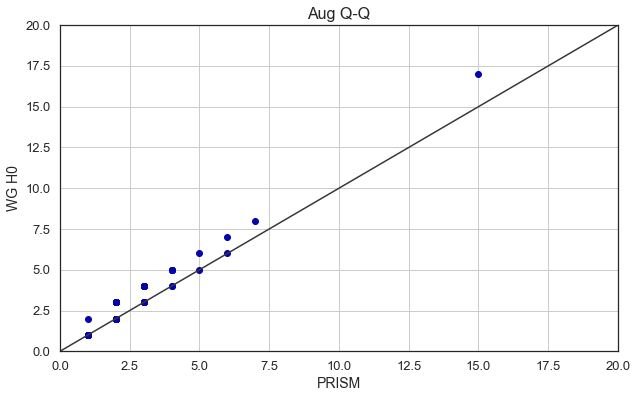

In [124]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [125]:
sns.set(style="ticks", color_codes=True)

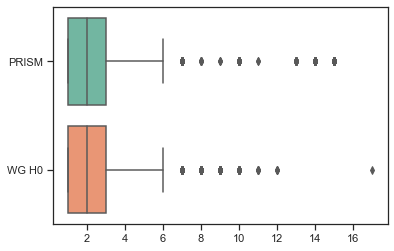

In [126]:
ax = sns.boxplot(data=CompAug, orient="h", palette="Set2")

In [127]:
sns.set(style="white", color_codes=True)

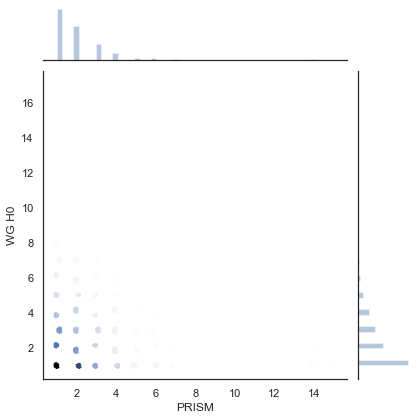

In [128]:
AugG = sns.jointplot(x='PRISM', y='WG H0', data=CompAug, kind="hex")

## Sep

First get our overall tracking values

In [129]:
AveLister.append( [ PRSepDF['Wet_Count'].mean(), H0SepDF['Wet_Count'].mean() ] )
VarLister.append( [ PRSepDF['Wet_Count'].var(), H0SepDF['Wet_Count'].var() ] )
SkewLister.append( [ PRSepDF['Wet_Count'].skew(), H0SepDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRSepDF['Wet_Count'].kurtosis(), H0SepDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRSepDF['Wet_Count'].count(), H0SepDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRSepDF['Wet_Count'].var() - PRSepDF['Wet_Count'].mean() ) / 
                            PRSepDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0SepDF['Wet_Count'].var() - H0SepDF['Wet_Count'].mean() ) / 
                            H0SepDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRSepDF['Wet_Count'].mean()**2.0 / 
                   ( PRSepDF['Wet_Count'].var() - PRSepDF['Wet_Count'].mean() ) ),
                  ( H0SepDF['Wet_Count'].mean()**2.0 / 
                   ( H0SepDF['Wet_Count'].var() - H0SepDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRSepDF['Wet_Count'].median(), H0SepDF['Wet_Count'].median() ] )
MaxLister.append( [ PRSepDF['Wet_Count'].max(), H0SepDF['Wet_Count'].max() ] )
MinLister.append( [ PRSepDF['Wet_Count'].min(), H0SepDF['Wet_Count'].min() ] )

In [130]:
NumPR = len( PRSepDF )
NumH0 = len( H0SepDF )
NumPR, NumH0

(20781, 21302292)

In [131]:
CompSep = pd.DataFrame( data={ 'PRISM' : np.array( PRSepDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0SepDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [132]:
display( HTML( CompSep.describe().to_html() ) )

,PRISM,WG H0
count,20781.000000,20781.000000
mean,1.863289,2.090563
std,1.202872,1.476501
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,10.000000,14.000000


In [133]:
PRQs = CompSep['PRISM'].quantile( q=OurQs )

In [134]:
H0Qs = CompSep['WG H0'].quantile( q=OurQs )

In [135]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

14.0

In [136]:
MaxVal = round( MaxVal, -1 ) + 0.0
MaxVal

10.0

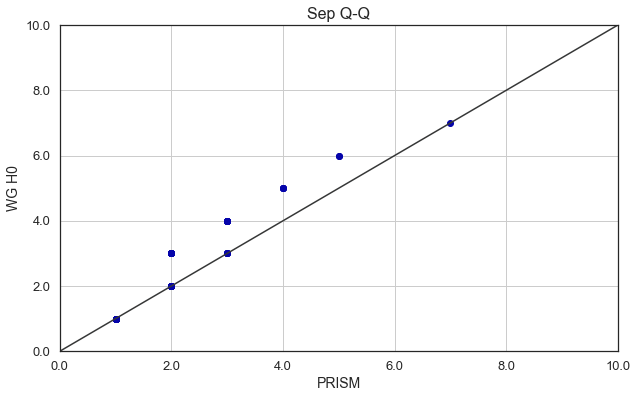

In [137]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [138]:
sns.set(style="ticks", color_codes=True)

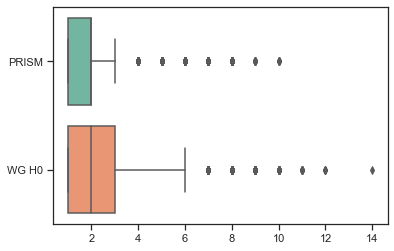

In [139]:
ax = sns.boxplot(data=CompSep, orient="h", palette="Set2")

In [140]:
sns.set(style="white", color_codes=True)

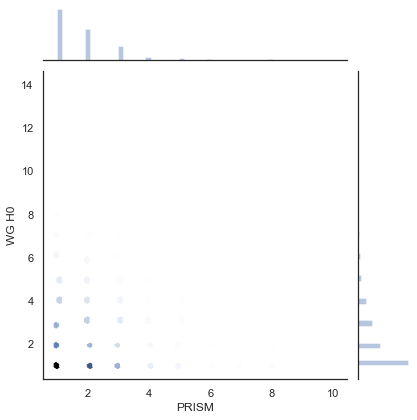

In [141]:
SepG = sns.jointplot(x='PRISM', y='WG H0', data=CompSep, kind="hex")

## Oct

First get our overall tracking values

In [142]:
AveLister.append( [ PROctDF['Wet_Count'].mean(), H0OctDF['Wet_Count'].mean() ] )
VarLister.append( [ PROctDF['Wet_Count'].var(), H0OctDF['Wet_Count'].var() ] )
SkewLister.append( [ PROctDF['Wet_Count'].skew(), H0OctDF['Wet_Count'].skew() ] )
KurtLister.append( [ PROctDF['Wet_Count'].kurtosis(), H0OctDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PROctDF['Wet_Count'].count(), H0OctDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PROctDF['Wet_Count'].var() - PROctDF['Wet_Count'].mean() ) / 
                            PROctDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0OctDF['Wet_Count'].var() - H0OctDF['Wet_Count'].mean() ) / 
                            H0OctDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PROctDF['Wet_Count'].mean()**2.0 / 
                   ( PROctDF['Wet_Count'].var() - PROctDF['Wet_Count'].mean() ) ),
                  ( H0OctDF['Wet_Count'].mean()**2.0 / 
                   ( H0OctDF['Wet_Count'].var() - H0OctDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PROctDF['Wet_Count'].median(), H0OctDF['Wet_Count'].median() ] )
MaxLister.append( [ PROctDF['Wet_Count'].max(), H0OctDF['Wet_Count'].max() ] )
MinLister.append( [ PROctDF['Wet_Count'].min(), H0OctDF['Wet_Count'].min() ] )

In [143]:
NumPR = len( PROctDF )
NumH0 = len( H0OctDF )
NumPR, NumH0

(19477, 18694148)

In [144]:
CompOct = pd.DataFrame( data={ 'PRISM' : np.array( PROctDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0OctDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [145]:
display( HTML( CompOct.describe().to_html() ) )

,PRISM,WG H0
count,19477.000000,19477.000000
mean,2.170252,2.374339
std,1.865462,1.700273
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,19.000000,15.000000


In [146]:
PRQs = CompOct['PRISM'].quantile( q=OurQs )

In [147]:
H0Qs = CompOct['WG H0'].quantile( q=OurQs )

In [148]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

19.0

In [149]:
MaxVal = round( MaxVal, -1 ) + 0.0
MaxVal

20.0

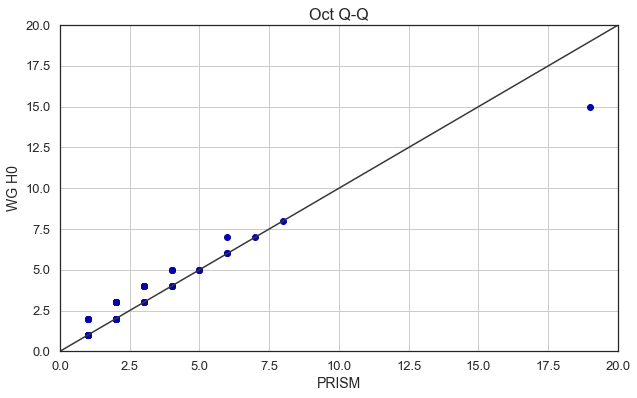

In [150]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [151]:
sns.set(style="ticks", color_codes=True)

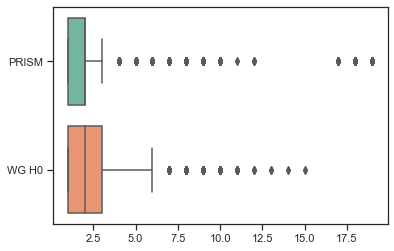

In [152]:
ax = sns.boxplot(data=CompOct, orient="h", palette="Set2")

In [153]:
sns.set(style="white", color_codes=True)

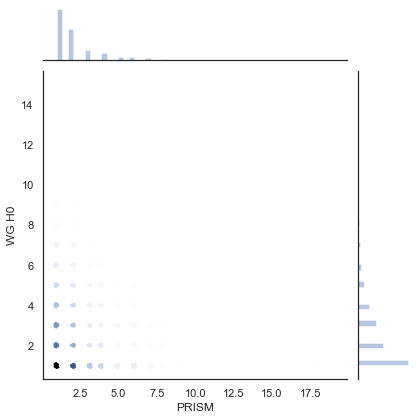

In [154]:
OctG = sns.jointplot(x='PRISM', y='WG H0', data=CompOct, kind="hex")

## Nov

First get our overall tracking values

In [155]:
AveLister.append( [ PRNovDF['Wet_Count'].mean(), H0NovDF['Wet_Count'].mean() ] )
VarLister.append( [ PRNovDF['Wet_Count'].var(), H0NovDF['Wet_Count'].var() ] )
SkewLister.append( [ PRNovDF['Wet_Count'].skew(), H0NovDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRNovDF['Wet_Count'].kurtosis(), H0NovDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRNovDF['Wet_Count'].count(), H0NovDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRNovDF['Wet_Count'].var() - PRNovDF['Wet_Count'].mean() ) / 
                            PRNovDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0NovDF['Wet_Count'].var() - H0NovDF['Wet_Count'].mean() ) / 
                            H0NovDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRNovDF['Wet_Count'].mean()**2.0 / 
                   ( PRNovDF['Wet_Count'].var() - PRNovDF['Wet_Count'].mean() ) ),
                  ( H0NovDF['Wet_Count'].mean()**2.0 / 
                   ( H0NovDF['Wet_Count'].var() - H0NovDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRNovDF['Wet_Count'].median(), H0NovDF['Wet_Count'].median() ] )
MaxLister.append( [ PRNovDF['Wet_Count'].max(), H0NovDF['Wet_Count'].max() ] )
MinLister.append( [ PRNovDF['Wet_Count'].min(), H0NovDF['Wet_Count'].min() ] )

In [156]:
NumPR = len( PRNovDF )
NumH0 = len( H0NovDF )
NumPR, NumH0

(13478, 15367154)

In [157]:
CompNov = pd.DataFrame( data={ 'PRISM' : np.array( PRNovDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0NovDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [158]:
display( HTML( CompNov.describe().to_html() ) )

,PRISM,WG H0
count,13478.000000,13478.000000
mean,1.987832,2.190607
std,1.240532,1.523123
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,8.000000,15.000000


In [159]:
PRQs = CompNov['PRISM'].quantile( q=OurQs )

In [160]:
H0Qs = CompNov['WG H0'].quantile( q=OurQs )

In [161]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

15.0

In [162]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

30.0

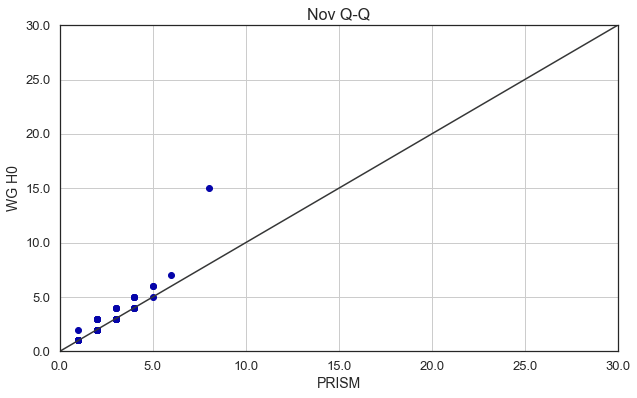

In [163]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [164]:
sns.set(style="ticks", color_codes=True)

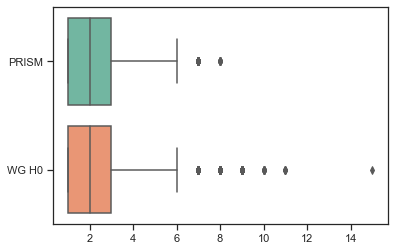

In [165]:
ax = sns.boxplot(data=CompNov, orient="h", palette="Set2")

In [166]:
sns.set(style="white", color_codes=True)

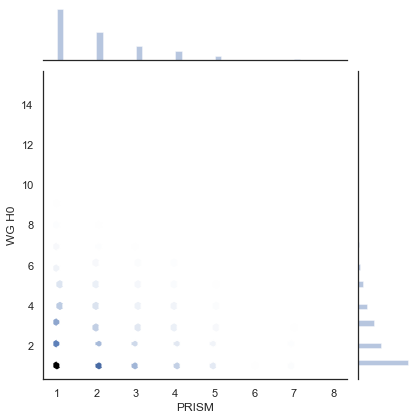

In [167]:
NovG = sns.jointplot(x='PRISM', y='WG H0', data=CompNov, kind="hex")

## Dec

First get our overall tracking values

In [168]:
AveLister.append( [ PRDecDF['Wet_Count'].mean(), H0DecDF['Wet_Count'].mean() ] )
VarLister.append( [ PRDecDF['Wet_Count'].var(), H0DecDF['Wet_Count'].var() ] )
SkewLister.append( [ PRDecDF['Wet_Count'].skew(), H0DecDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRDecDF['Wet_Count'].kurtosis(), H0DecDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRDecDF['Wet_Count'].count(), H0DecDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRDecDF['Wet_Count'].var() - PRDecDF['Wet_Count'].mean() ) / 
                            PRDecDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0DecDF['Wet_Count'].var() - H0DecDF['Wet_Count'].mean() ) / 
                            H0DecDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRDecDF['Wet_Count'].mean()**2.0 / 
                   ( PRDecDF['Wet_Count'].var() - PRDecDF['Wet_Count'].mean() ) ),
                  ( H0DecDF['Wet_Count'].mean()**2.0 / 
                   ( H0DecDF['Wet_Count'].var() - H0DecDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRDecDF['Wet_Count'].median(), H0DecDF['Wet_Count'].median() ] )
MaxLister.append( [ PRDecDF['Wet_Count'].max(), H0DecDF['Wet_Count'].max() ] )
MinLister.append( [ PRDecDF['Wet_Count'].min(), H0DecDF['Wet_Count'].min() ] )

In [169]:
NumPR = len( PRDecDF )
NumH0 = len( H0DecDF )
NumPR, NumH0

(13768, 16114978)

In [170]:
CompDec = pd.DataFrame( data={ 'PRISM' : np.array( PRDecDF['Wet_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0DecDF['Wet_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [171]:
display( HTML( CompDec.describe().to_html() ) )

,PRISM,WG H0
count,13768.000000,13768.000000
mean,1.823286,2.050843
std,1.170106,1.452085
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,9.000000,16.000000


In [172]:
PRQs = CompDec['PRISM'].quantile( q=OurQs )

In [173]:
H0Qs = CompDec['WG H0'].quantile( q=OurQs )

In [174]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

16.0

In [175]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

30.0

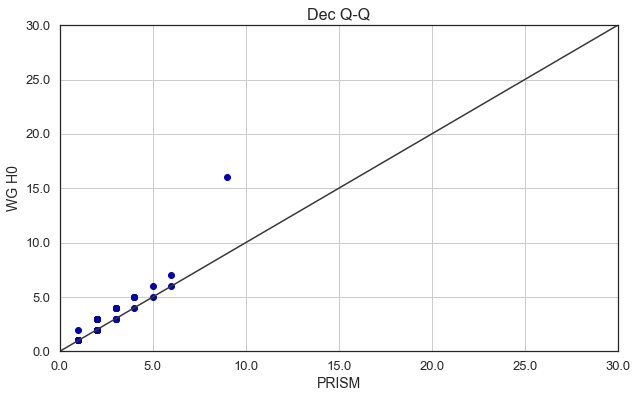

In [176]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [177]:
sns.set(style="ticks", color_codes=True)

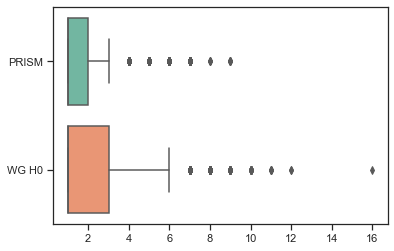

In [178]:
ax = sns.boxplot(data=CompDec, orient="h", palette="Set2")

In [179]:
sns.set(style="white", color_codes=True)

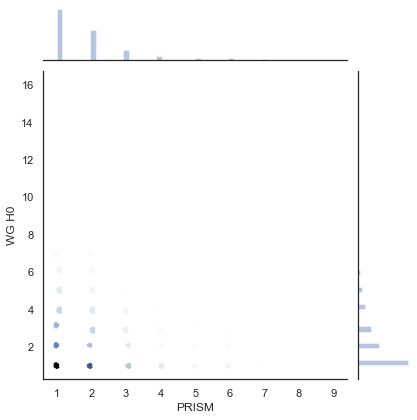

In [180]:
DecG = sns.jointplot(x='PRISM', y='WG H0', data=CompDec, kind="hex")

## Output

In [181]:
AveLister.append( [ PRAllDF['Wet_Count'].mean(), H0DDDF['Wet_Count'].mean() ] )
VarLister.append( [ PRAllDF['Wet_Count'].var(), H0DDDF['Wet_Count'].var() ] )
SkewLister.append( [ PRAllDF['Wet_Count'].skew(), H0DDDF['Wet_Count'].skew() ] )
KurtLister.append( [ PRAllDF['Wet_Count'].kurtosis(), H0DDDF['Wet_Count'].kurtosis() ] )
CntLister.append( [ PRAllDF['Wet_Count'].count(), H0DDDF['Wet_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAllDF['Wet_Count'].var() - PRAllDF['Wet_Count'].mean() ) / 
                            PRAllDF['Wet_Count'].var() ) ),
                  (1.0 - (( H0DDDF['Wet_Count'].var() - H0DDDF['Wet_Count'].mean() ) / 
                            H0DDDF['Wet_Count'].var() ) ) ])
NLister.append( [ ( PRAllDF['Wet_Count'].mean()**2.0 / 
                   ( PRAllDF['Wet_Count'].var() - PRAllDF['Wet_Count'].mean() ) ),
                  ( H0DDDF['Wet_Count'].mean()**2.0 / 
                   ( H0DDDF['Wet_Count'].var() - H0DDDF['Wet_Count'].mean() ) ) ])
MedianLister.append( [ PRAllDF['Wet_Count'].median(), H0DDDF['Wet_Count'].median() ] )
MaxLister.append( [ PRAllDF['Wet_Count'].max(), H0DDDF['Wet_Count'].max() ] )
MinLister.append( [ PRAllDF['Wet_Count'].min(), H0DDDF['Wet_Count'].min() ] )

In [182]:
DataDict = dict()
DataDict["PRISM_Ave"] = np.array( [x[0] for x in AveLister], np.float32 )
DataDict["H0_Ave"] = np.array( [x[1] for x in AveLister], np.float32 )
DataDict["PRISM_Med"] = np.array( [x[0] for x in MedianLister], np.float32 )
DataDict["H0_Med"] = np.array( [x[1] for x in MedianLister], np.float32 )
DataDict["PRISM_Max"] = np.array( [x[0] for x in MaxLister], np.float32 )
DataDict["H0_Max"] = np.array( [x[1] for x in MaxLister], np.float32 )
DataDict["PRISM_Min"] = np.array( [x[0] for x in MinLister], np.float32 )
DataDict["H0_Min"] = np.array( [x[1] for x in MinLister], np.float32 )
DataDict["PRISM_Var"] = np.array( [x[0] for x in VarLister], np.float32 )
DataDict["H0_Var"] = np.array( [x[1] for x in VarLister], np.float32 )
DataDict["PRISM_Skew"] = np.array( [x[0] for x in SkewLister], np.float32 )
DataDict["H0_Skew"] = np.array( [x[1] for x in SkewLister], np.float32 )
DataDict["PRISM_Kurt"] = np.array( [x[0] for x in KurtLister], np.float32 )
DataDict["H0_Kurt"] = np.array( [x[1] for x in KurtLister], np.float32 )
DataDict["PRISM_Cnt"] = np.array( [x[0] for x in CntLister], np.float32 )
DataDict["H0_Cnt"] = np.array( [x[1] for x in CntLister], np.float32 )
DataDict["PRISM_P"] = np.array( [x[0] for x in PLister], np.float32 )
DataDict["H0_P"] = np.array( [x[1] for x in PLister], np.float32 )
DataDict["PRISM_N"] = np.array( [x[0] for x in NLister], np.float32 )
DataDict["H0_N"] = np.array( [x[1] for x in NLister], np.float32 )
SumCompDF = pd.DataFrame( index=MonthLister, data=DataDict )

In [183]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_WetDay_Verification.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl" ) as writer:
    SumCompDF.to_excel( writer, sheet_name="Summary" )